In [36]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# loading dataset
loan_dataset = pd.read_csv('/content/loan_status.csv')

In [ ]:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
loan_dataset.shape

(614, 13)

In [ ]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# label encoding / last columns Y/N changing to 1/0
loan_dataset.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [ ]:
loan_dataset['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
# change 3+ to 4 in Dependents column
loan_dataset = loan_dataset.replace(to_replace='3+',value=4)

In [ ]:
loan_dataset['Dependents'].value_counts()

0    345
1    102
2    101
4     51
Name: Dependents, dtype: int64

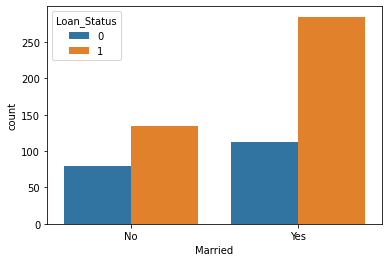

In [ ]:
# data visualization
# viewing the data b/w married and loan status
sns.countplot(x='Married', hue= 'Loan_Status', data = loan_dataset)

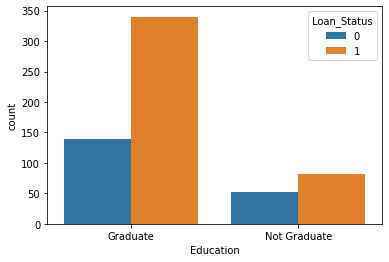

In [18]:
# countplot of education and loan status
sns.countplot(x='Education', hue= 'Loan_Status', data = loan_dataset)

In [19]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [39]:
loan_dataset.replace({'Gender':{'Male':1,'Female':0}, 'Education':{'Graduate':1,'Not Graduate':0}, 'Married': {'Yes':1,'No':0}, 'Property_Area':{'Rural':0, 'Semiurban': 1, 'Urban': 2}, 'Self_Employed':{'Yes':1,'No':0} }, inplace= True )

In [40]:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1.0,1.0,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1.0,1.0,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1.0,1.0,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1.0,1.0,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1.0,1.0,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [41]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [30]:
loan_dataset = loan_dataset.dropna()
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1.0,1.0,1,1,No,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,Yes,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,No,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,No,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1.0,1.0,2,1,Yes,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,1,No,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1.0,1.0,4,1,No,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1.0,1.0,1,1,No,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1.0,1.0,2,1,No,7583,0.0,187.0,360.0,1.0,2,1


In [58]:
loan_dataset.to_csv('loan.csv')

In [42]:
loan_dataset.shape

(480, 13)

In [43]:
X = loan_dataset.drop(columns =['Loan_ID','Loan_Status'], axis = True)
Y = loan_dataset['Loan_Status']

In [44]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1       1.0      1.0          1          1              0             4583   
2       1.0      1.0          0          1              1             3000   
3       1.0      1.0          0          0              0             2583   
4       1.0      0.0          0          1              0             6000   
5       1.0      1.0          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609     0.0      0.0          0          1              0             2900   
610     1.0      1.0          4          1              0             4106   
611     1.0      1.0          1          1              0             8072   
612     1.0      1.0          2          1              0             7583   
613     0.0      0.0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [45]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=2)

In [46]:
X.shape, X_train.shape, X_test.shape

((480, 11), (384, 11), (96, 11))

In [47]:
# training the model
# training with support vector classifier model
classifier = svm.SVC(kernel='linear')

In [48]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [49]:
# finding the accuracy score with training data
X_train_pred = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_pred)
training_data_accuracy

0.7786458333333334

In [50]:
# finding accuracy on testing data
X_test_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_pred)
test_data_accuracy

0.8125

In [51]:
# finding confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)

In [53]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1])

In [54]:
Y_test

205    1
549    1
513    0
415    1
271    1
      ..
201    1
345    1
607    1
543    1
469    0
Name: Loan_Status, Length: 96, dtype: int64

In [56]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[14, 16],
       [ 2, 64]])

In [69]:
# making predictive system
input_data = (1.0,1.0,4,1,0,3036,2504.0,158.0,360.0,0.0,1)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)
prediction = classifier.predict(input_data_reshape)
print(prediction)
if (prediction[0]==0):
  print("the person will not get loan", prediction)
else:
  print("the person will get loan", prediction)


[0]
the person will not get loan [0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
